In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


/Users/juturydheeraj/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('adult.csv')


In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe(exclude='O')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [8]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [9]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [52]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [11]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [30]:
df['country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

### Target Variable distribution

In [13]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

#### Target variable is imbalanced

/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/141925043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


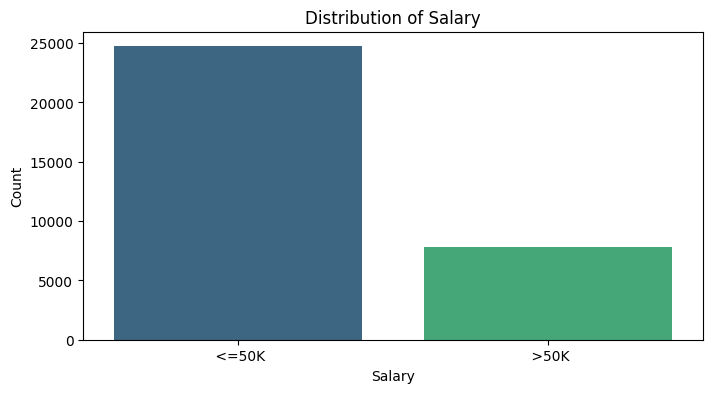

In [19]:
value_counts = df['salary'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Adding labels and title
plt.xlabel('salary'.capitalize())
plt.ylabel('Count')
plt.title(f'Distribution of {"salary".capitalize()}')
plt.show()

##### Replace "?" with Nan values and later replace them with imputation

In [26]:
df.replace(' ?', np.nan, inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Performing mode and median imputation for categorical and numerical respectively

In [28]:
num_imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[np.number]))

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=[object]).columns] = cat_imputer.fit_transform(df.select_dtypes(include=[object]))


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  country         32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


### Univariate analysis

Feature: age
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


<Figure size 1500x500 with 0 Axes>

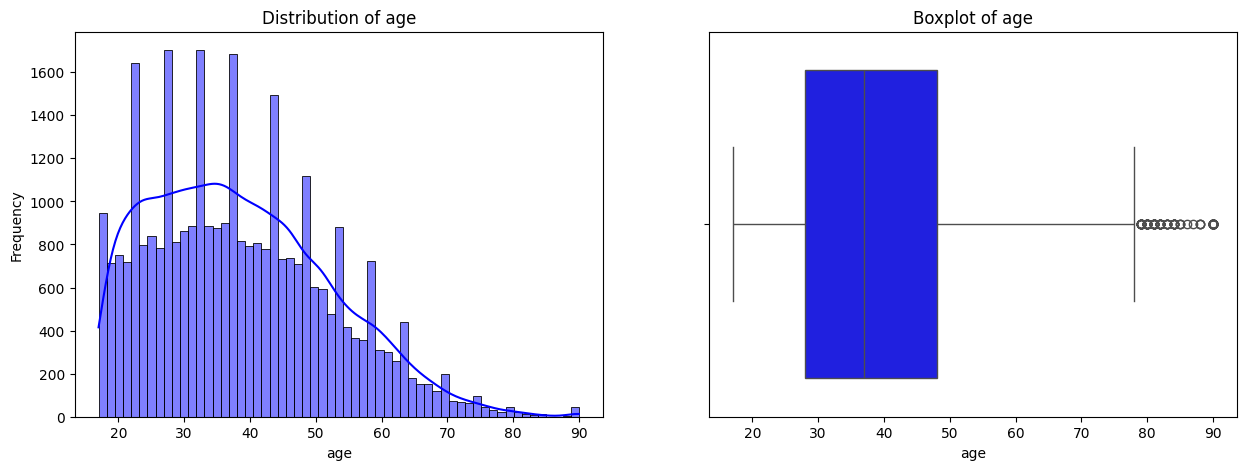

Feature: workclass


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

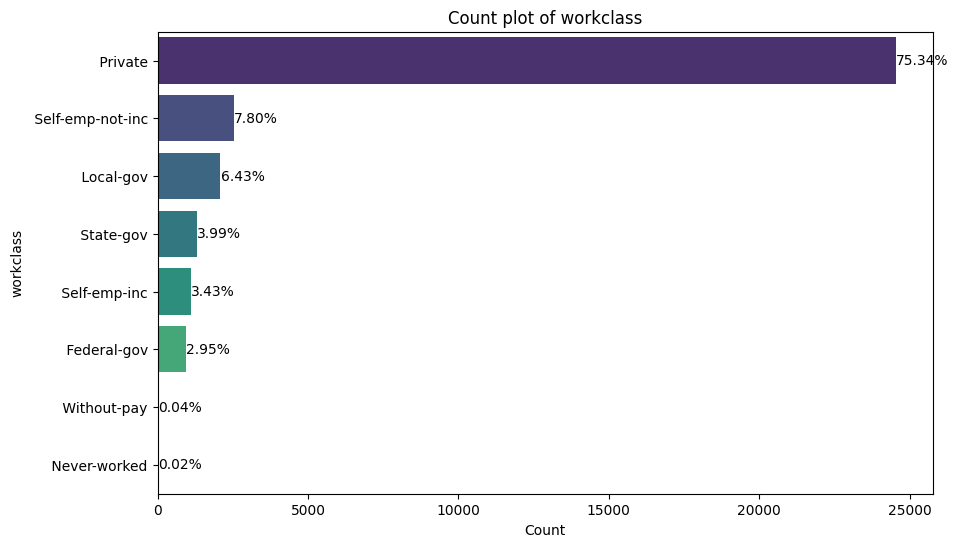

Feature: fnlwgt
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


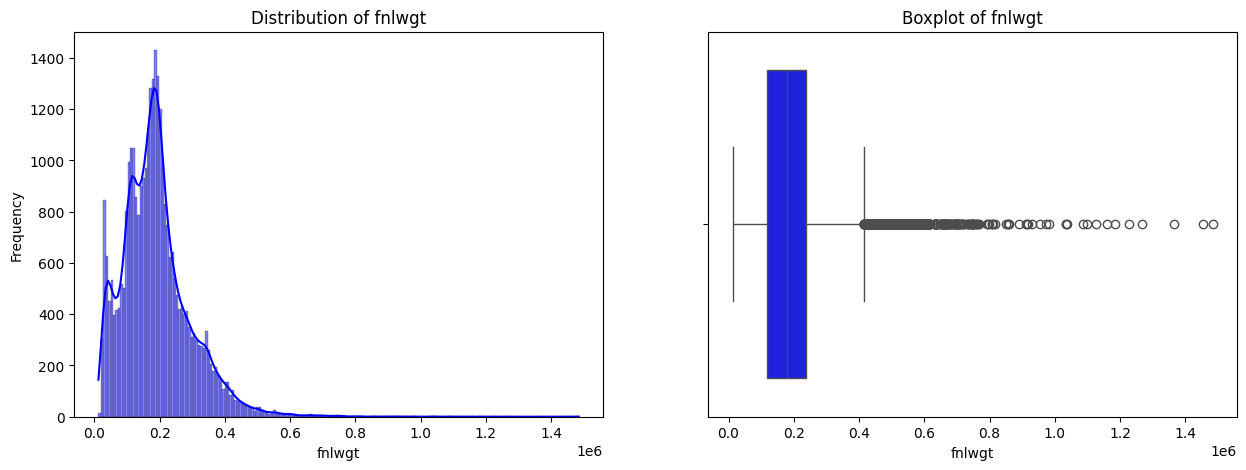

Feature: education


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

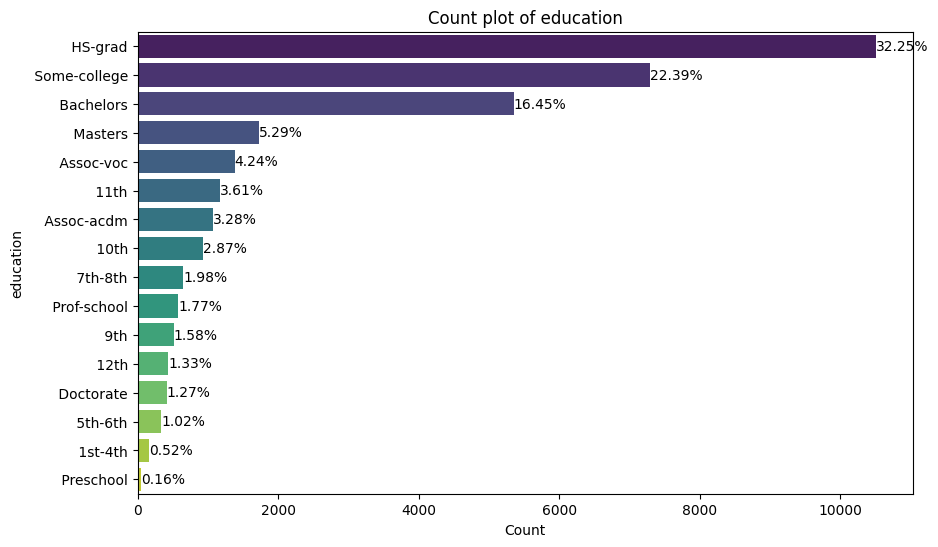

Feature: education-num
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


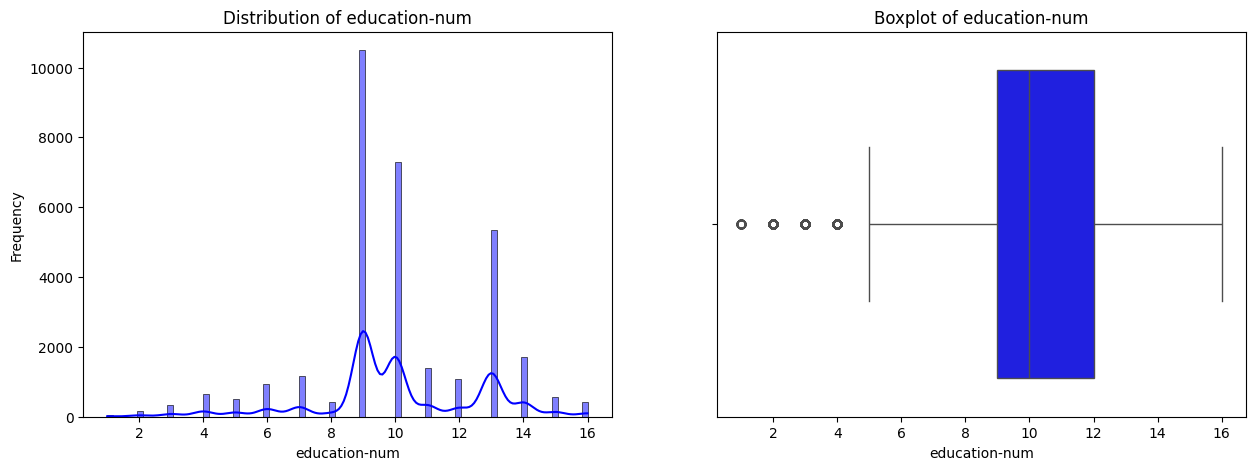

Feature: marital-status


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

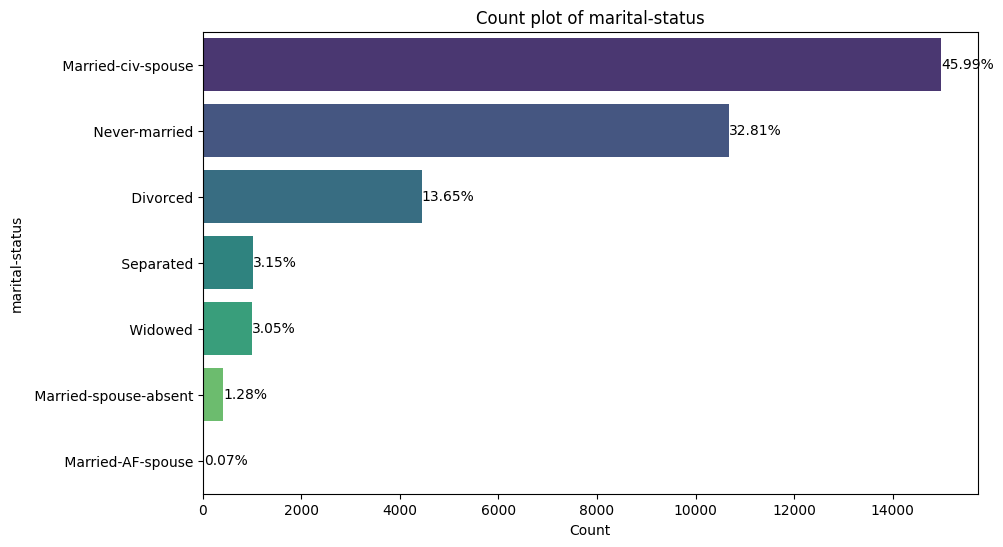

Feature: occupation


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

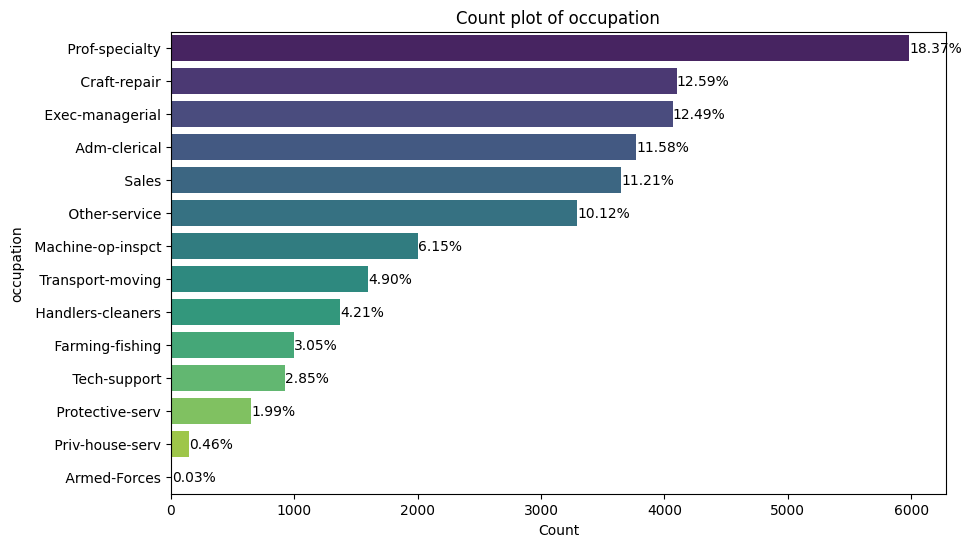

Feature: relationship


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

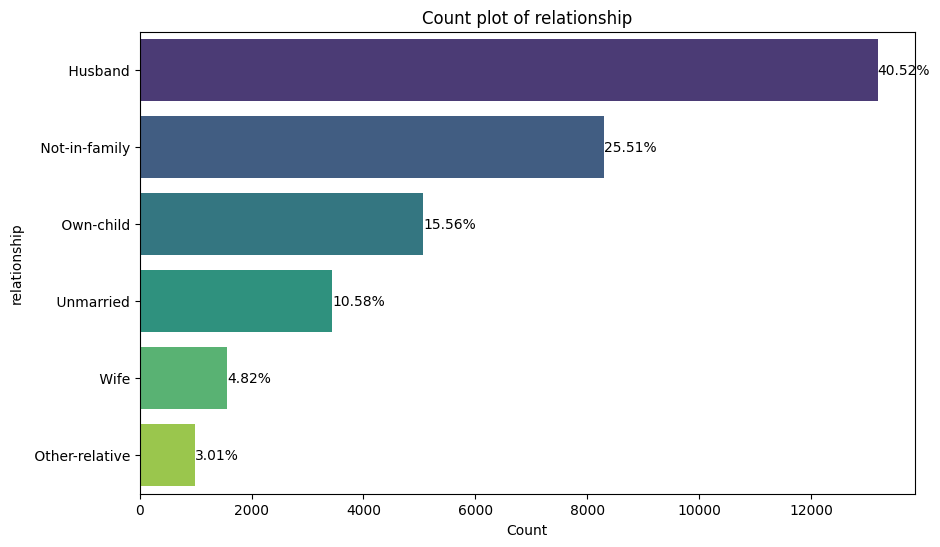

Feature: race


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

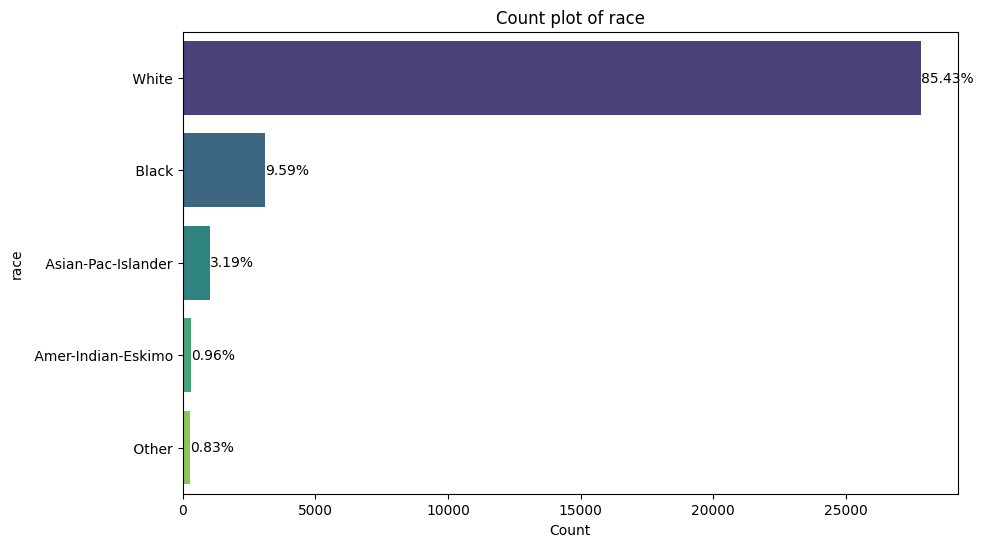

Feature: sex


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

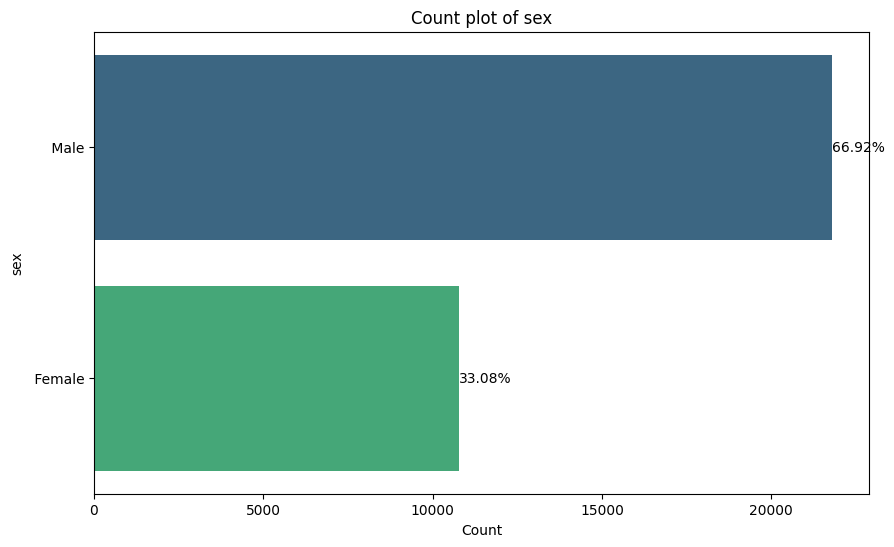

Feature: capital-gain
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


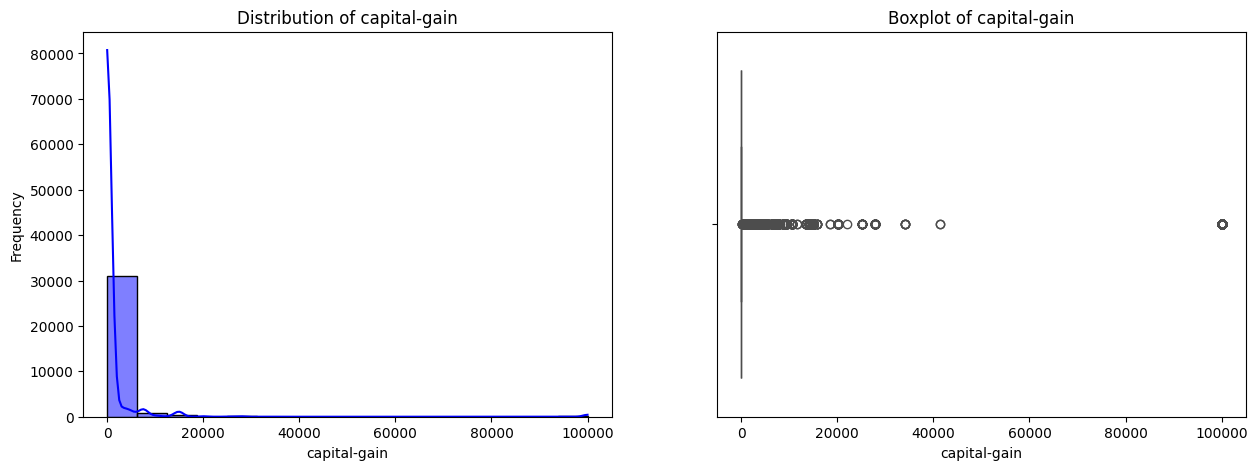

Feature: capital-loss
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


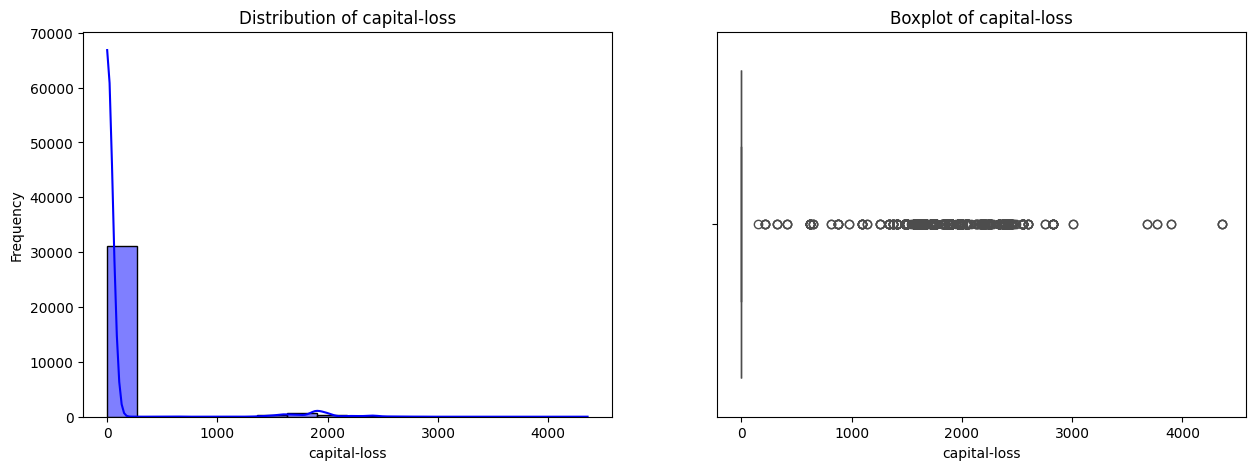

Feature: hours-per-week
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


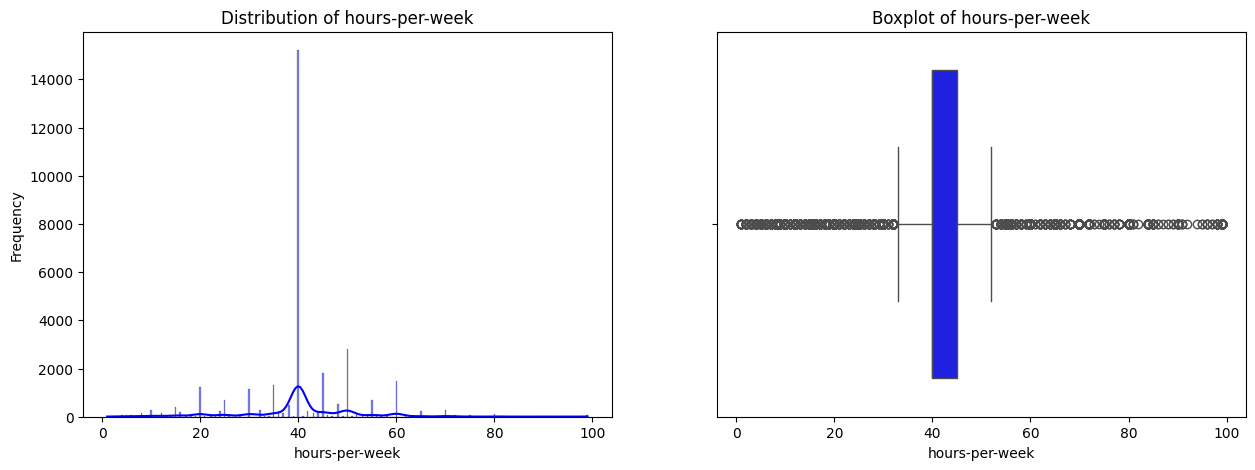

Feature: country


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

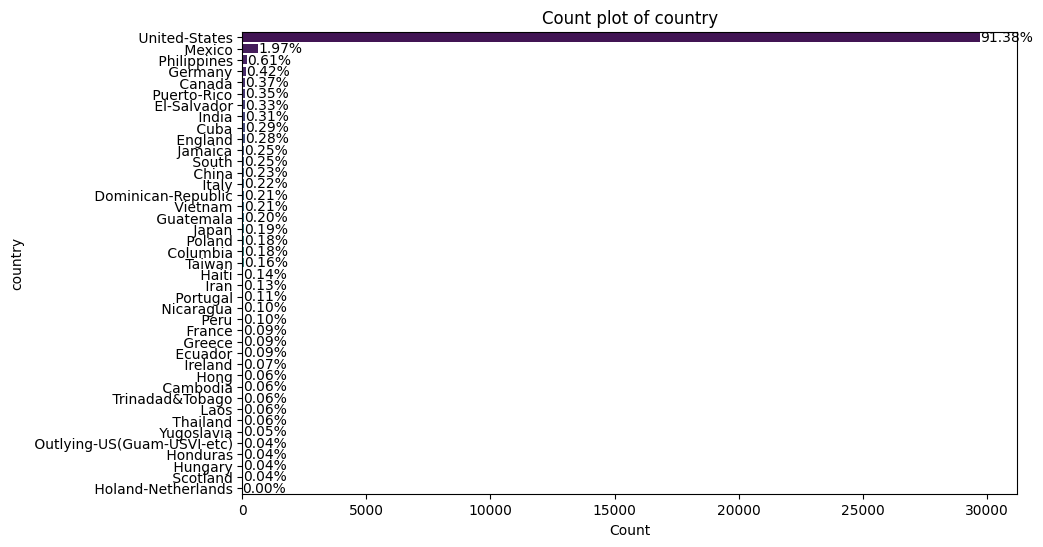

Feature: salary


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/1104751020.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)


<Figure size 1500x500 with 0 Axes>

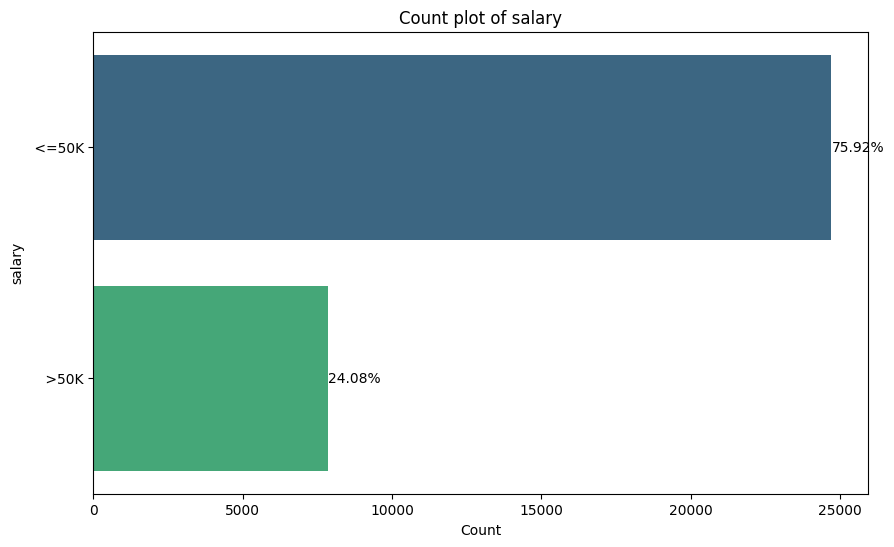

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis(df):
    # Define a size for the plots
    plt.figure(figsize=(15, 5))
    
    # Iterate through each column in the DataFrame
    for column in df.columns:
        plt.figure(figsize=(15, 5))
        if pd.api.types.is_numeric_dtype(df[column]):
            # Continuous feature
            print(f"Feature: {column}")
            print(df[column].describe())
            plt.subplot(1, 2, 1)
            sns.histplot(df[column], kde=True, color='blue')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[column], color='blue')
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.show()

        # elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        #     # Categorical feature
        #     print(f"Feature: {column}")
        #     print(df[column].value_counts(dropna=False))
        #     sns.countplot(y=df[column], palette='viridis', order=df[column].value_counts().index)
        #     plt.title(f'Count plot of {column}')
        #     plt.xlabel('Count')
        #     plt.ylabel(column)
        #     plt.show()
        elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
            # Categorical feature
            print(f"Feature: {column}")
            value_counts = df[column].value_counts(dropna=False)
            percentages = 100 * value_counts / value_counts.sum()
            
            # Create the count plot
            plt.figure(figsize=(10, 6))
            ax = sns.countplot(y=df[column], palette='viridis', order=value_counts.index)
            
            # Add percentage labels
            for (i, p) in enumerate(ax.patches):
                width = p.get_width()
                percentage_label = f'{percentages.iloc[i]:.2f}%'
                ax.text(width + 0.1, p.get_y() + p.get_height() / 2, percentage_label, ha='left', va='center')
            
            plt.title(f'Count plot of {column}')
            plt.xlabel('Count')
            plt.ylabel(column)
            plt.show()


# Example usage:
# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')
univariate_analysis(df)


### Observations
#### Age Distribution: 
1. The age distribution is right-skewed, with a majority of individuals in the `20-40` age range, and fewer older individuals (60+ years).
2. Several outliers beyond age `80` suggest a small number of exceptionally elderly individuals in the dataset.
#### Workclass Distribution:
1. The majority of individuals are employed in the `private sector`, indicating its dominance in the dataset.
2. Categories such as `Federal-gov`, `Without-pay`, and `Never-worked` are underrepresented, suggesting they make up a small proportion of the overall population.
#### fnlwgt Distribution :
1. The distribution of fnlwgt is highly right-skewed with most values concentrated below `0.4 million`, indicating a heavy tail towards higher values.
2. The boxplot highlights the presence of numerous outliers above the upper quartile, reinforcing the skewness observed in the histogram.
#### Education Distribution: 
1. The majority of individuals have attained at least a high school diploma (`HS-grad`), followed by those with some college education, indicating that secondary education is the most prevalent.
2. Advanced degrees such as `Doctorates` and `Master's` are less common compared to high school and college education, pointing towards fewer individuals pursuing higher education beyond the undergraduate level.
#### Education-num Distribution:
1. The distribution indicates prominent peaks at specific values, especially at `9`, representing high school graduation, with significant counts also for `10 (some college)` and `13 (Bachelor's degree)`.
2. The boxplot shows that most of the data lies between 9 and 13 education years, with some outliers below 2 years, suggesting that early education stages have fewer representatives in the dataset.
#### Marital Status Distribution:
1. The majority of individuals are `Married-civ-spouse`, indicating a high proportion of the population in a conventional married status.
2. `Never-married` is the second largest group, followed by `Divorced`, highlighting significant subsets of the population either living singly or separated from marriage.
#### Occupation Distribution:
1. `Prof-specialty` is the most common occupation, indicating a high prevalence of professional specialty roles among the population.
2. Other top occupations include `Craft-repair` and `Exec-managerial`, suggesting a diverse distribution of employment across skilled and managerial roles.
#### Relationship Distribution:
1. `Husband` is the most frequently reported relationship status, with a significant count compared to other categories, indicating a high number of male household roles.
2. `Not-in-family` and `Own-child` follow, reflecting a smaller proportion of individuals living outside typical family structures or being children within the household.
#### Race Distribution:
1. The `White` category significantly outnumbers other races, indicating a predominant representation in the dataset.
2. Other racial categories such as `Black` and `Asian-Pac-Islander` are less represented, suggesting a lower but notable diversity within the population.
#### Sex Distribution:
1. `Male` individuals form a larger portion of the dataset compared to `Female`, indicating a higher representation of male individuals.
2. The count difference between `Male` and `Female` categories is notable but not excessively large, showing a relatively balanced gender distribution.
#### Capital Gain Distribution:
1. Most individuals have a low or zero `capital-gain`, with frequencies dropping sharply for higher gains, indicating that significant capital gains are relatively rare.
2. The boxplot highlights numerous outliers at higher values, showing occasional larger capital gains among a small segment of the population.
#### Capital Loss Distribution:
1. Similar to capital gains, the majority of individuals report very low or zero `capital-loss`, with higher losses being rare.
2. The boxplot reveals many outliers, suggesting occasional significant capital losses among some individuals.
#### Hours per Week Distribution:
1. The most observed workweek is around `40 hours`, indicating a standard full-time work engagement for the majority.
2. The boxplot shows a concentration around the median of 40 hours, with some outliers working significantly fewer or more hours.
#### Salary Distribution:
1. The majority of individuals earn `<=50K`, indicating a higher proportion of lower-income earners within the dataset.
2. The count of individuals earning `>50K` is significant but clearly lower, highlighting a notable income gap.
#### Country Distribution:
1. The `United-States` overwhelmingly dominates the dataset, indicating a strong geographic concentration.
2. Other countries like `Mexico`, `Philippines`, and `Germany` have minimal representation, showing less geographic diversity outside of the United States.

Bivariate Analysis: age vs salary
          count       mean        std   min   25%   50%   75%   max
salary                                                             
 <=50K  24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
 >50K    7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_11676/2948151466.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=df, palette='coolwarm')


<Figure size 1500x500 with 0 Axes>

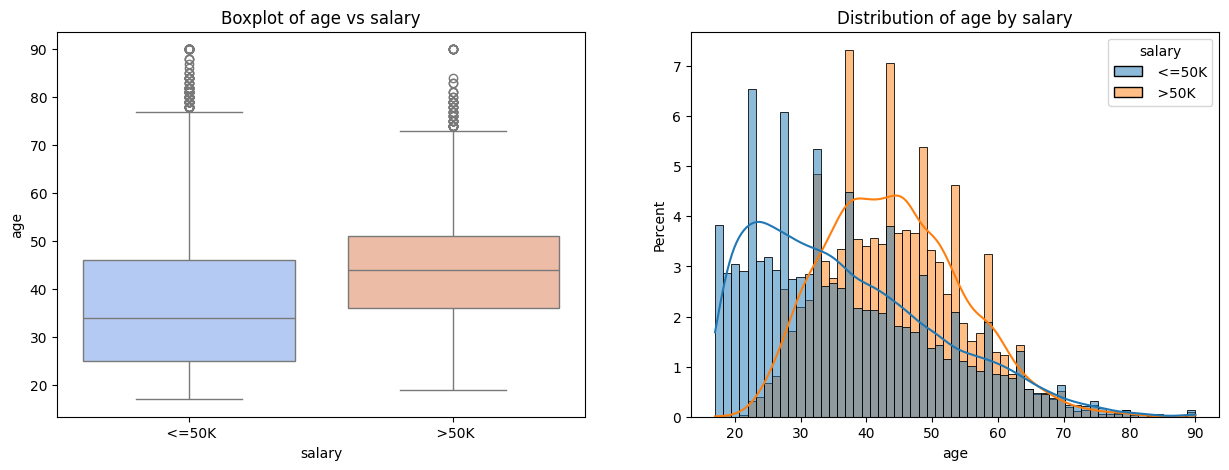

Bivariate Analysis: workclass vs salary
salary              <=50K   >50K
workclass                       
 ?                   1645    191
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            17733   4963
 Self-emp-inc         494    622
 Self-emp-not-inc    1817    724
 State-gov            945    353
 Without-pay           14      0


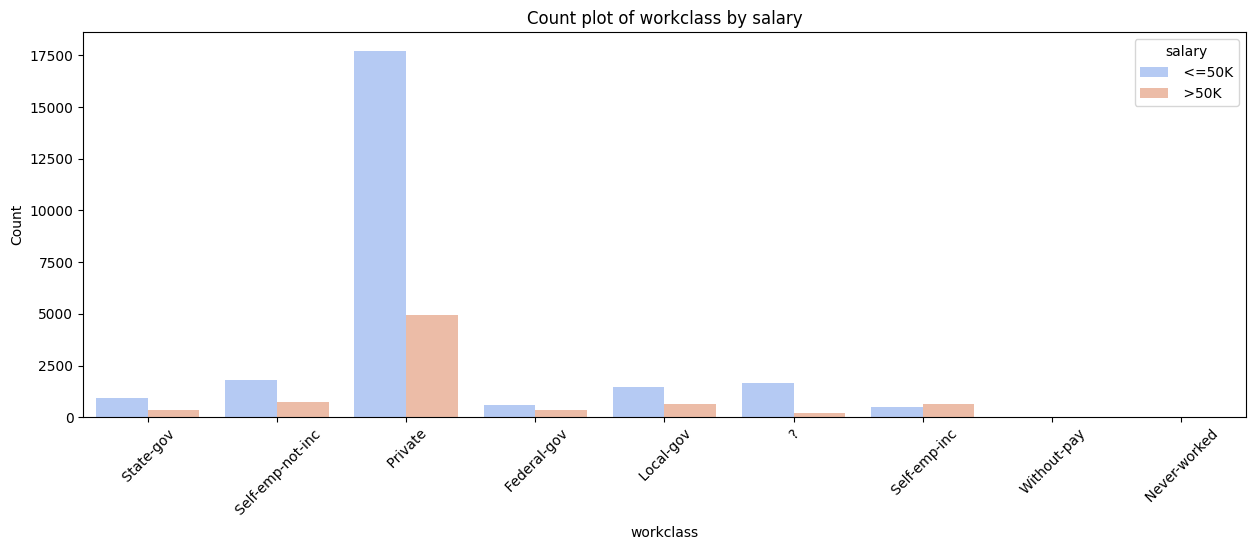

Chi-square test between workclass and salary:
Chi2 Statistic: 1045.7085997281692, p-value: 2.026505431120716e-220

Bivariate Analysis: fnlwgt vs salary
          count          mean            std      min       25%       50%  \
salary                                                                      
 <=50K  24720.0  190340.86517  106482.271195  12285.0  117606.0  179465.0   
 >50K    7841.0  188005.00000  102541.775472  14878.0  119101.0  176101.0   

             75%        max  
salary                       
 <=50K  239023.0  1484705.0  
 >50K   230959.0  1226583.0  


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_11676/2948151466.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=df, palette='coolwarm')


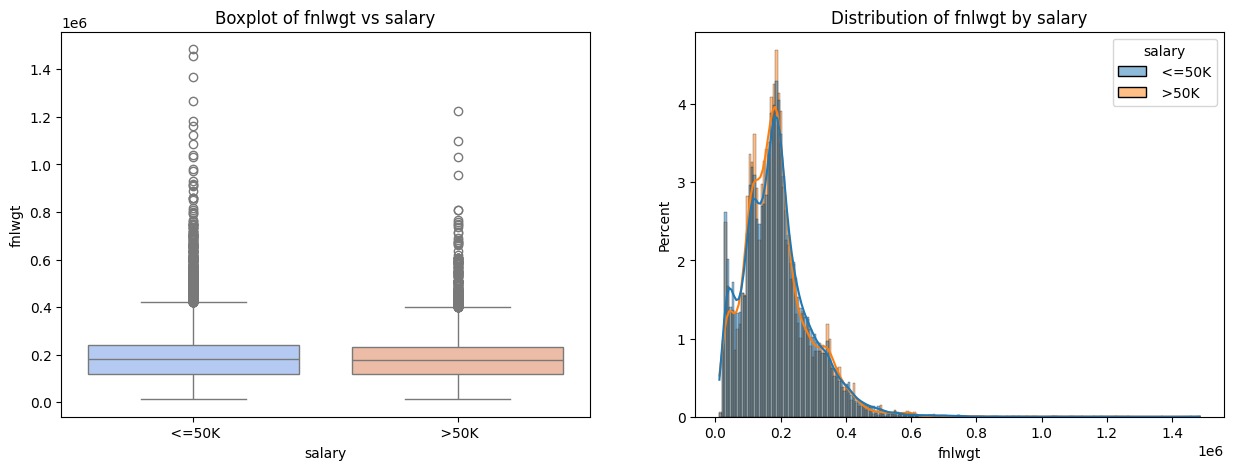

Bivariate Analysis: education vs salary
salary          <=50K   >50K
education                   
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          162      6
 5th-6th          317     16
 7th-8th          606     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3134   2221
 Doctorate        107    306
 HS-grad         8826   1675
 Masters          764    959
 Preschool         51      0
 Prof-school      153    423
 Some-college    5904   1387


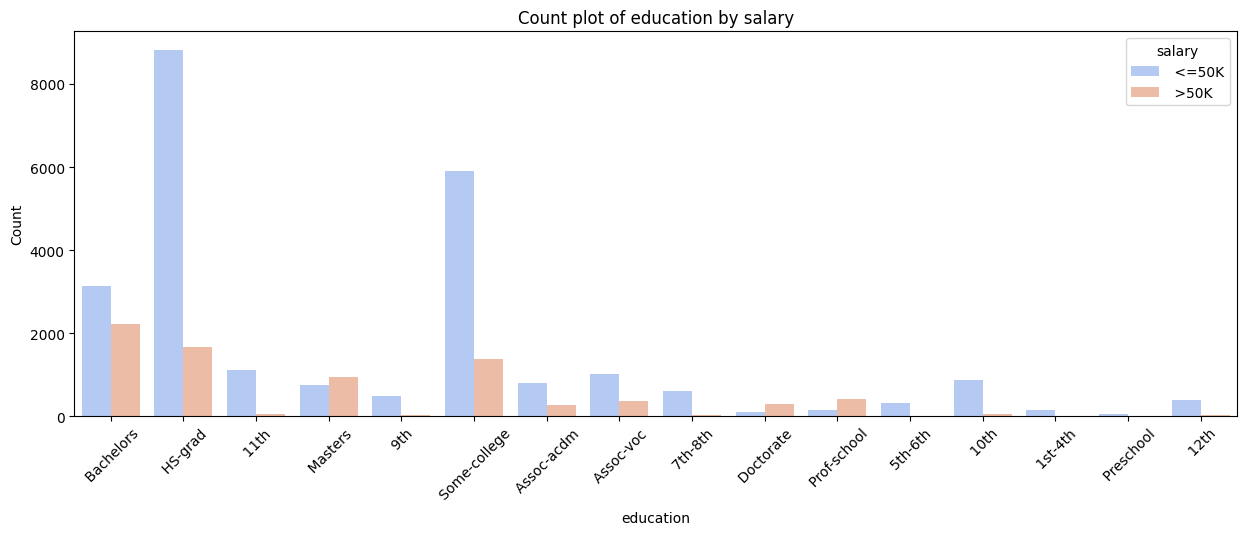

Chi-square test between education and salary:
Chi2 Statistic: 4429.653302288619, p-value: 0.0

Bivariate Analysis: education-num vs salary
          count       mean       std  min   25%   50%   75%   max
salary                                                           
 <=50K  24720.0   9.595065  2.436147  1.0   9.0   9.0  10.0  16.0
 >50K    7841.0  11.611657  2.385129  2.0  10.0  12.0  13.0  16.0


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_11676/2948151466.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=df, palette='coolwarm')


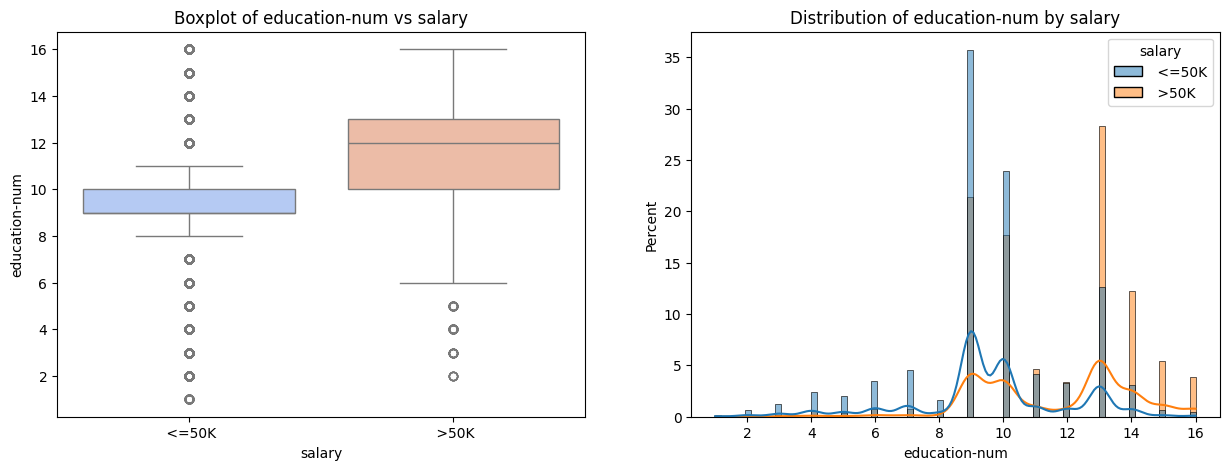

Bivariate Analysis: marital-status vs salary
salary                   <=50K   >50K
marital-status                       
 Divorced                 3980    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8284   6692
 Married-spouse-absent     384     34
 Never-married           10192    491
 Separated                 959     66
 Widowed                   908     85


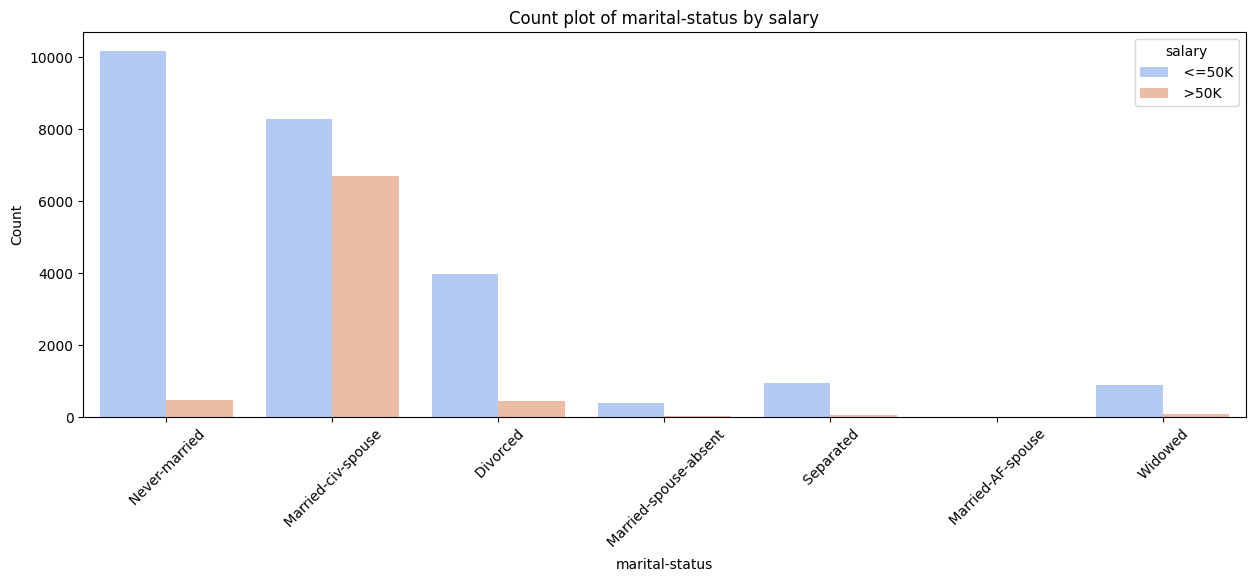

Chi-square test between marital-status and salary:
Chi2 Statistic: 6517.741653663022, p-value: 0.0

Bivariate Analysis: occupation vs salary
salary               <=50K   >50K
occupation                       
 ?                    1652    191
 Adm-clerical         3263    507
 Armed-Forces            8      1
 Craft-repair         3170    929
 Exec-managerial      2098   1968
 Farming-fishing       879    115
 Handlers-cleaners    1284     86
 Machine-op-inspct    1752    250
 Other-service        3158    137
 Priv-house-serv       148      1
 Prof-specialty       2281   1859
 Protective-serv       438    211
 Sales                2667    983
 Tech-support          645    283
 Transport-moving     1277    320


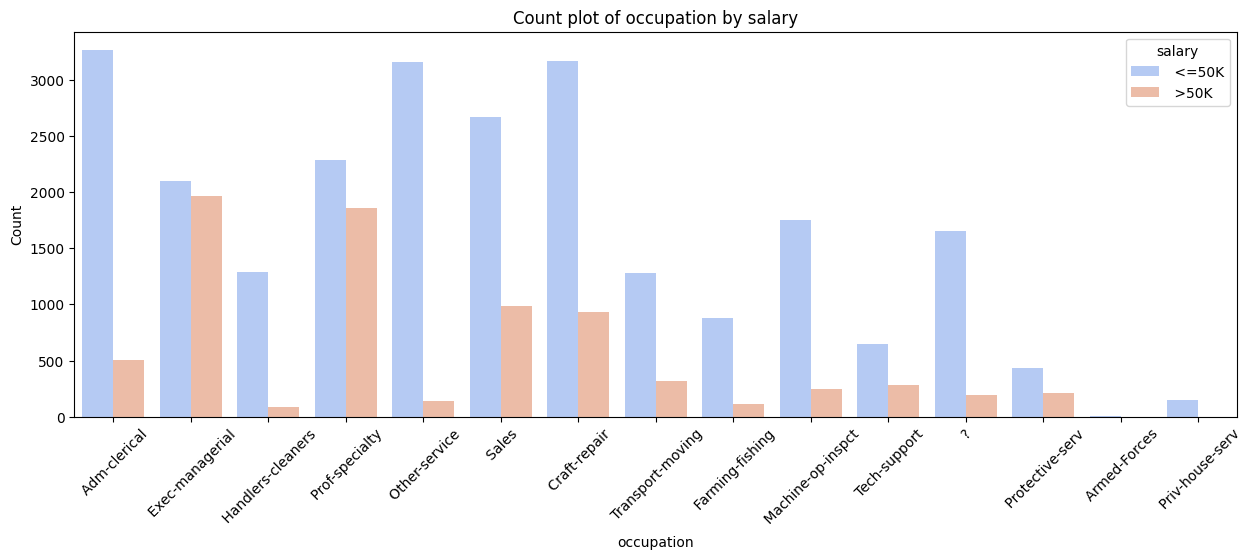

Chi-square test between occupation and salary:
Chi2 Statistic: 4031.974280247181, p-value: 0.0

Bivariate Analysis: relationship vs salary
salary            <=50K   >50K
relationship                  
 Husband           7275   5918
 Not-in-family     7449    856
 Other-relative     944     37
 Own-child         5001     67
 Unmarried         3228    218
 Wife               823    745


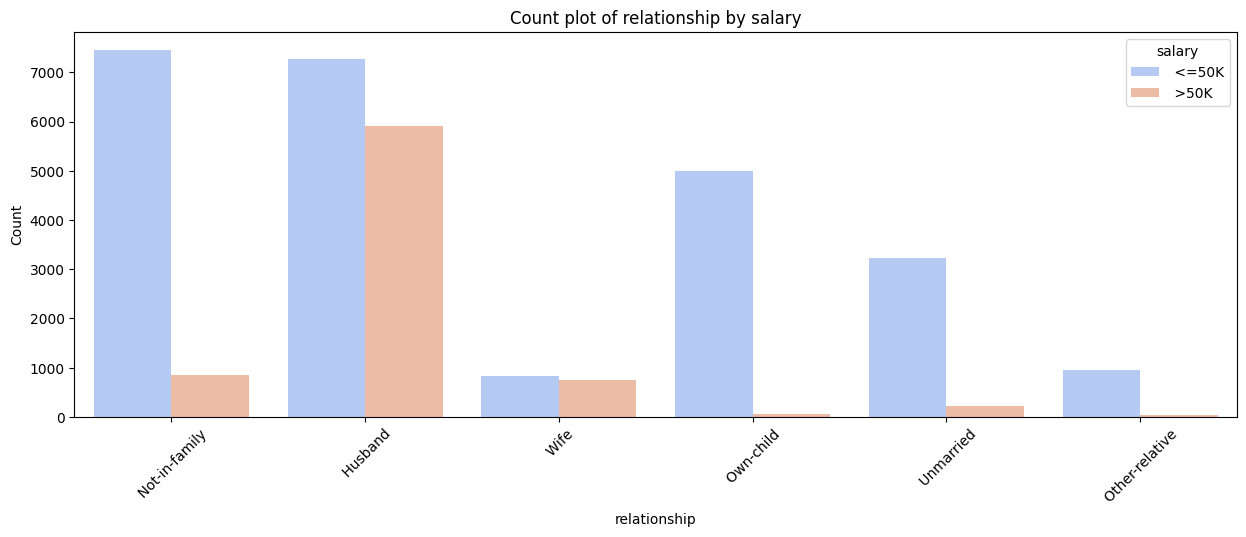

Chi-square test between relationship and salary:
Chi2 Statistic: 6699.07689685885, p-value: 0.0

Bivariate Analysis: race vs salary
salary                <=50K   >50K
race                              
 Amer-Indian-Eskimo     275     36
 Asian-Pac-Islander     763    276
 Black                 2737    387
 Other                  246     25
 White                20699   7117


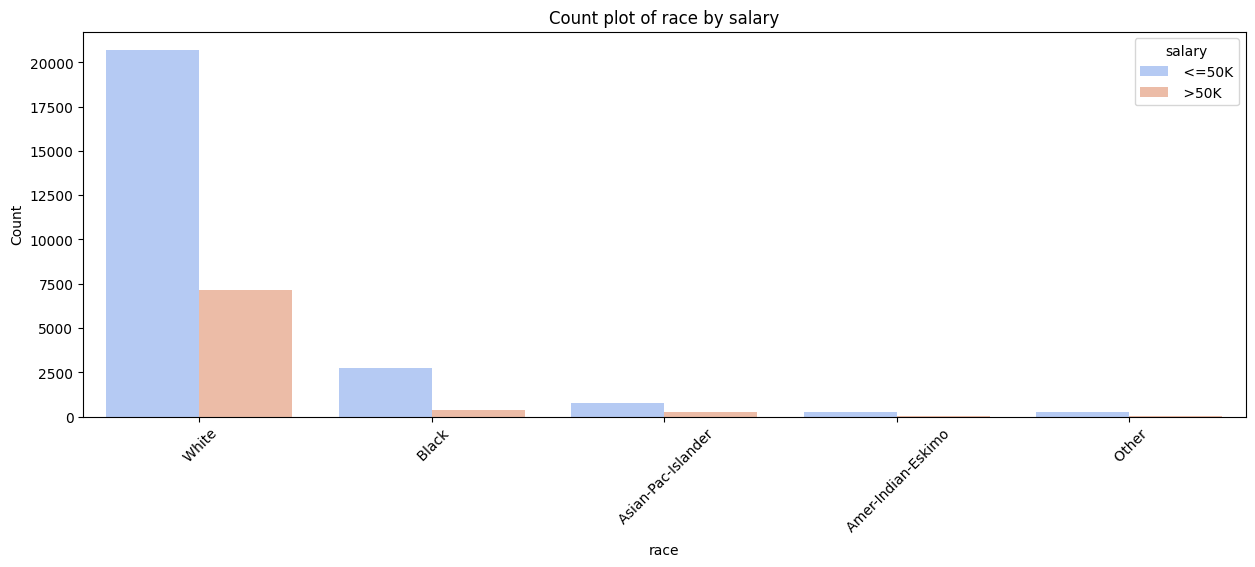

Chi-square test between race and salary:
Chi2 Statistic: 330.9204310085741, p-value: 2.305960610160958e-70

Bivariate Analysis: sex vs salary
salary    <=50K   >50K
sex                   
 Female    9592   1179
 Male     15128   6662


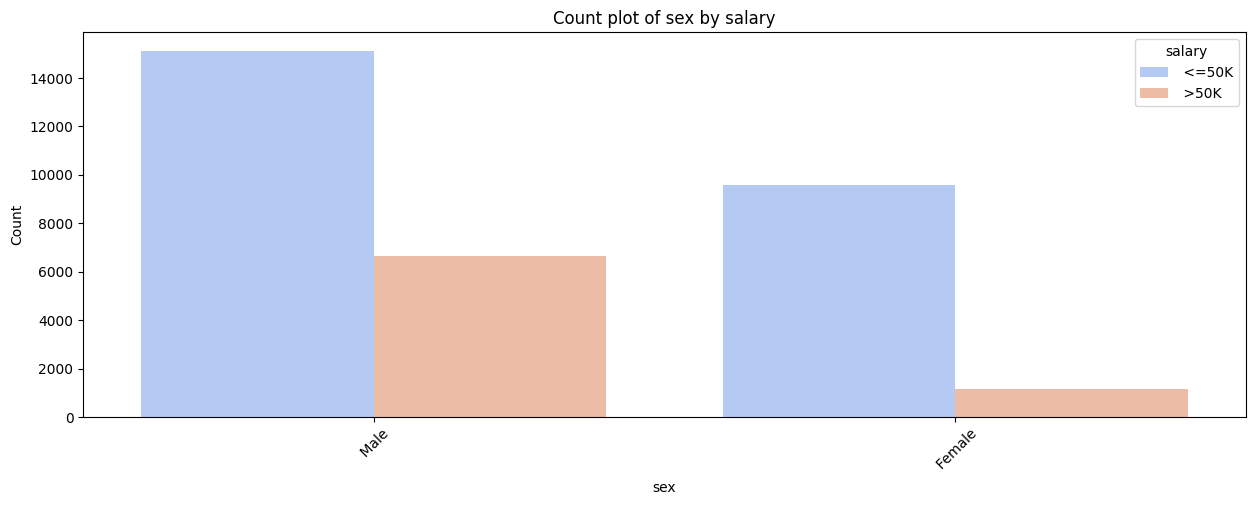

Chi-square test between sex and salary:
Chi2 Statistic: 1517.813409134445, p-value: 0.0

Bivariate Analysis: capital-gain vs salary
          count         mean           std  min  25%  50%  75%      max
salary                                                                 
 <=50K  24720.0   148.752468    963.139307  0.0  0.0  0.0  0.0  41310.0
 >50K    7841.0  4006.142456  14570.378951  0.0  0.0  0.0  0.0  99999.0


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_11676/2948151466.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=df, palette='coolwarm')


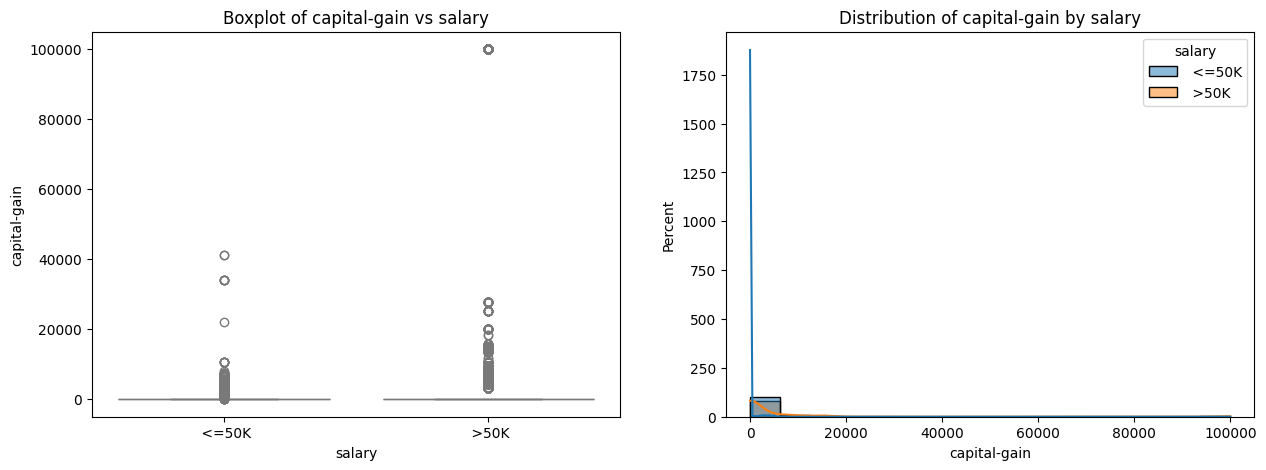

Bivariate Analysis: capital-loss vs salary
          count        mean         std  min  25%  50%  75%     max
salary                                                             
 <=50K  24720.0   53.142921  310.755769  0.0  0.0  0.0  0.0  4356.0
 >50K    7841.0  195.001530  595.487574  0.0  0.0  0.0  0.0  3683.0


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_11676/2948151466.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=df, palette='coolwarm')


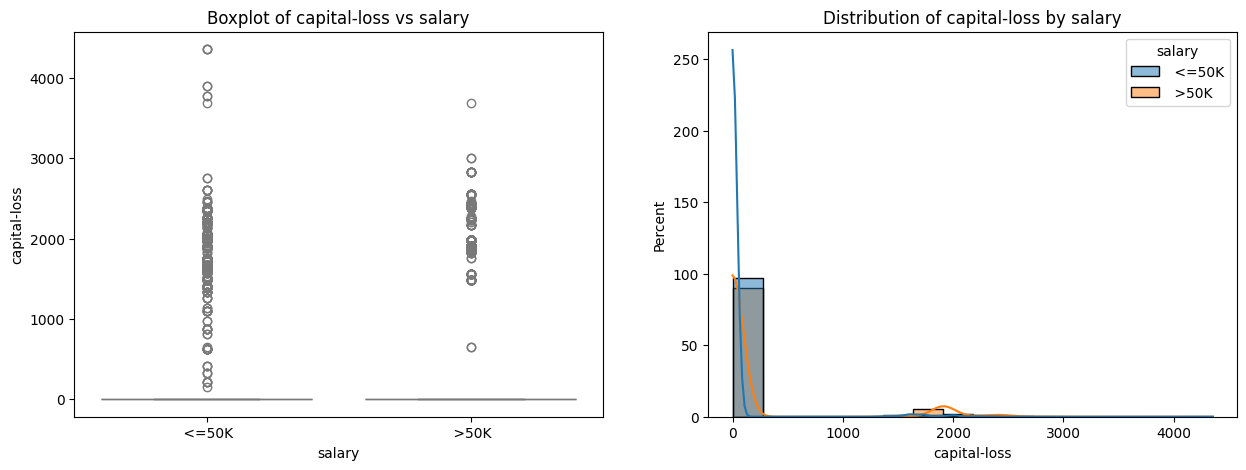

Bivariate Analysis: hours-per-week vs salary
          count       mean        std  min   25%   50%   75%   max
salary                                                            
 <=50K  24720.0  38.840210  12.318995  1.0  35.0  40.0  40.0  99.0
 >50K    7841.0  45.473026  11.012971  1.0  40.0  40.0  50.0  99.0


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_11676/2948151466.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=df, palette='coolwarm')


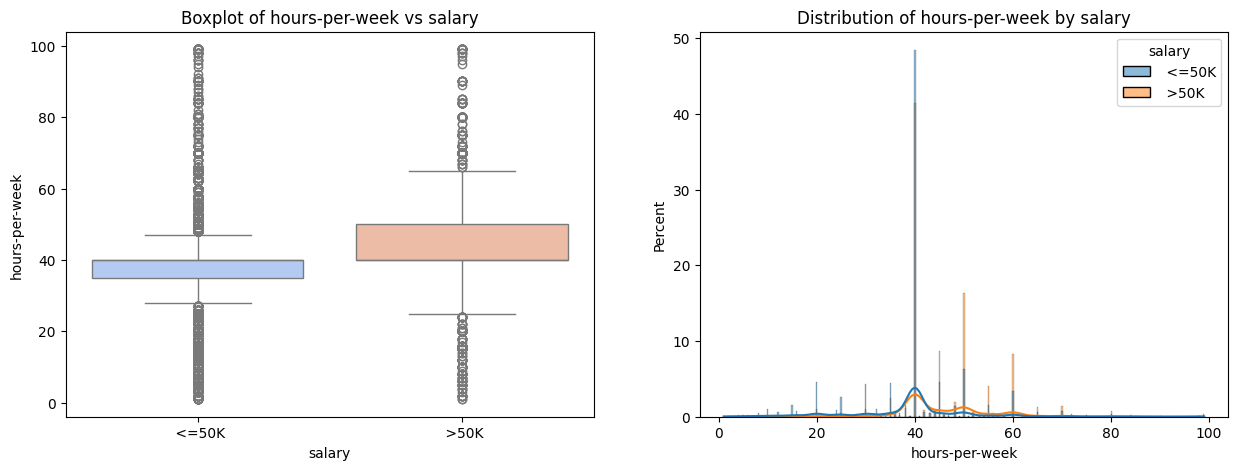

Bivariate Analysis: country vs salary
salary                        <=50K   >50K
country                                   
 ?                              437    146
 Cambodia                        12      7
 Canada                          82     39
 China                           55     20
 Columbia                        57      2
 Cuba                            70     25
 Dominican-Republic              68      2
 Ecuador                         24      4
 El-Salvador                     97      9
 England                         60     30
 France                          17     12
 Germany                         93     44
 Greece                          21      8
 Guatemala                       61      3
 Haiti                           40      4
 Holand-Netherlands               1      0
 Honduras                        12      1
 Hong                            14      6
 Hungary                         10      3
 India                           60     40
 Iran           

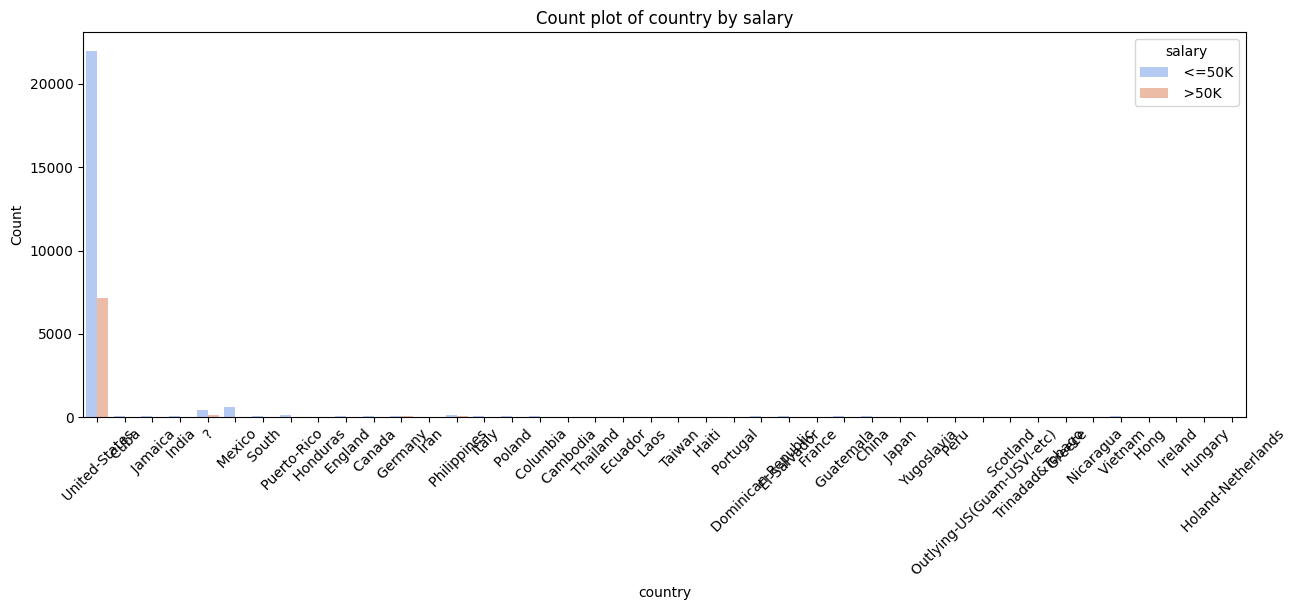

Chi-square test between country and salary:
Chi2 Statistic: 317.2303857833171, p-value: 2.2113858852543023e-44



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def bivariate_analysis(df, target):
    # Define a size for the plots
    plt.figure(figsize=(15, 5))
    
    # Iterate through each column in the DataFrame except the target
    for column in df.columns:
        if column == target:
            continue
        
        plt.figure(figsize=(15, 5))
        if pd.api.types.is_numeric_dtype(df[column]):
            # Continuous feature
            print(f"Bivariate Analysis: {column} vs {target}")
            print(df.groupby(target)[column].describe())
            
            plt.subplot(1, 2, 1)
            sns.boxplot(x=target, y=column, data=df, palette='coolwarm')
            plt.title(f'Boxplot of {column} vs {target}')
            plt.xlabel(target)
            plt.ylabel(column)
            
            plt.subplot(1, 2, 2)
            sns.histplot(
                data=df, x=column, hue=target, 
                fill=True, kde=True, 
                stat='percent', common_norm=False, 
                alpha=0.5
            )
            plt.title(f'Distribution of {column} by {target}')
            plt.xlabel(column)
            plt.ylabel('Percent')
            plt.show()

            # Check correlation if target is continuous
            if pd.api.types.is_numeric_dtype(df[target]):
                corr = df[column].corr(df[target])
                print(f'Correlation between {column} and {target}: {corr}\n')

        elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
            # Categorical feature
            print(f"Bivariate Analysis: {column} vs {target}")
            crosstab = pd.crosstab(df[column], df[target])
            print(crosstab)
            
            sns.countplot(x=column, hue=target, data=df, palette='coolwarm')
            plt.title(f'Count plot of {column} by {target}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

            # Chi-square test for independence
            if len(crosstab.columns) > 1:
                chi2, p, dof, ex = stats.chi2_contingency(crosstab)
                print(f'Chi-square test between {column} and {target}:')
                print(f'Chi2 Statistic: {chi2}, p-value: {p}\n')
            else:
                print(f"Chi-square test not applicable for {column} vs {target} as one category dominates.\n")

# Example usage:
# Assuming df is your DataFrame and 'salary' is the target variable
# df = pd.read_csv('your_data.csv')
bivariate_analysis(df, 'salary')


## Bivariate of Features and Salary
### Education Distribution
- Individuals with a high school education or some college predominantly earn <=50K. 
- Master's, Doctorate, and Professional-School degrees show a higher proportion of individuals earning >50K, but overall fewer in number compared to Bachelor's or HS-grad.

### fnlwgt Distribution
- The boxplots show that there is no significant difference in fnlwgt between the two salary categories, with a similar range and median.
- Both distributions have many outliers, but the bulk of data is centered around lower values of fnlwgt for both salary categories.

### Workclass Distribution
- The majority of individuals work in the private sector, with significantly more earning <=50K than >50K.
- Self-employment (not incorporated and incorporated) has a relatively higher proportion of individuals earning >50K compared to other workclasses.

### Age Distribution
- Higher salaries (>50K) are more common among older individuals, with the median age being higher for the >50K category.
- Younger individuals are more prevalent in the <=50K salary category.

### Occupation Distribution
- Occupations such as Executive-managerial, Professional-specialty, and Sales have a relatively higher proportion of individuals earning >50K.
- Admin-clerical, Handlers-cleaners, and Other-service occupations have a larger number of individuals earning <=50K.

### Relationship Distribution
- Most individuals categorized as Husband or Wife have a higher tendency to earn >50K compared to other relationship categories.
- Non-family and Unmarried individuals predominantly fall in the <=50K salary category.

### Race Distribution
- The distribution shows that a higher percentage of White individuals earn both <=50K and >50K compared to other races.
- Black and other racial categories have a significantly smaller representation, with the majority earning <=50K.

### Sex Distribution
- A higher number of males earn >50K compared to females.
- Females largely fall in the <=50K salary category, indicating a gender disparity in salary.

### Capital-Gain Distribution
- Both salary categories have similarly structured distributions for capital gains, with most individuals having low or zero capital gains.
- A notable few outliers have very high capital gains, predominantly in the >50K salary category.

### Hours-Per-Week Distribution
- Individuals earning >50K tend to work more hours per week compared to those earning <=50K, as indicated by the higher median in the boxplot.
- The distribution shows a peak around 40 hours per week for both salary categories, but the high-income group has more representation in higher working hours.

### Country Distribution
- The majority of individuals, both earning <=50K and >50K, are from the United States.
- There is considerably less representation from other countries, with the United States showing a higher count predominantly in the <=50K category.

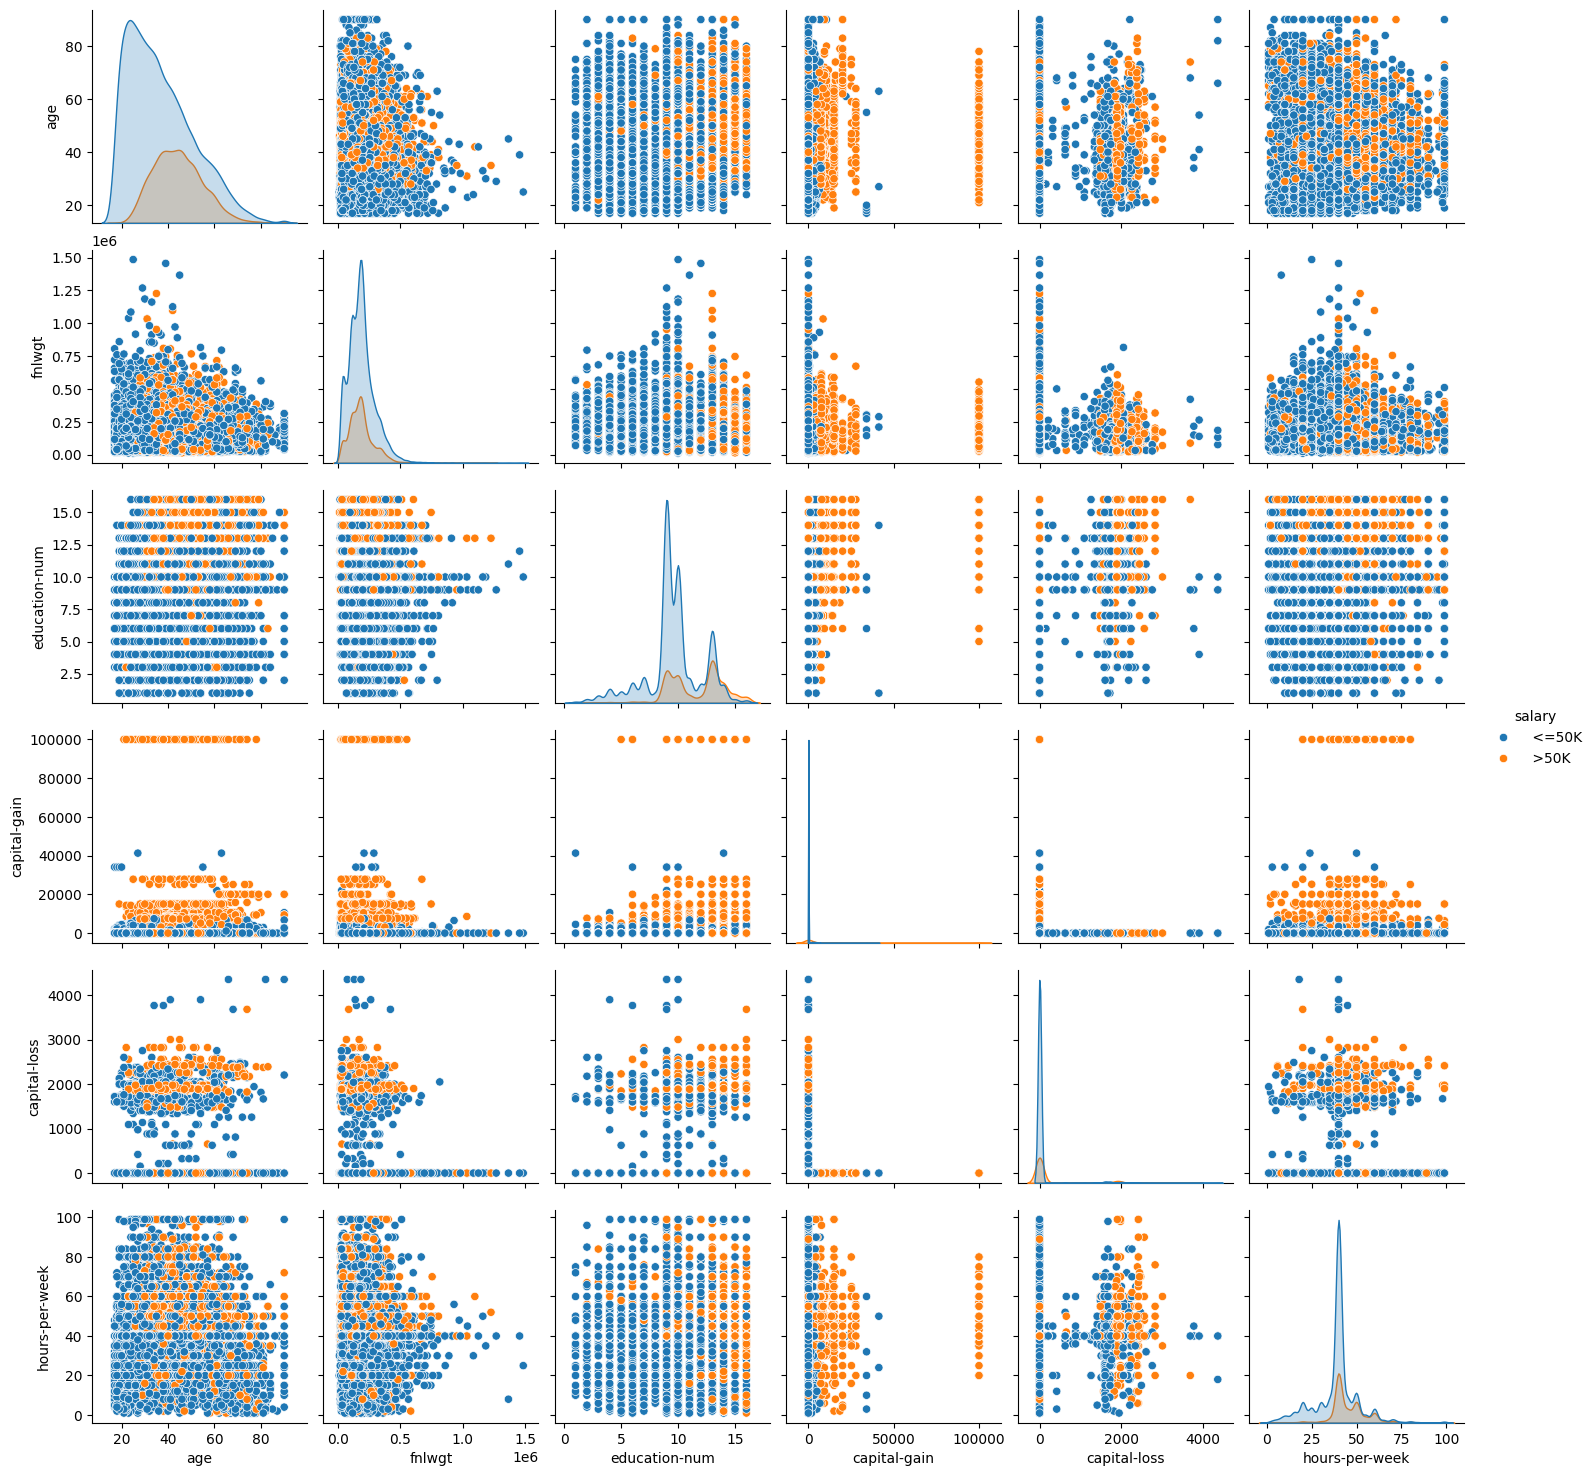

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def scatterplot_numeric_features(df):
    # Filter numeric features
    numeric_df = df.select_dtypes(include='number')
    numeric_df['salary']=df['salary']
    # Generate pairplot for numeric features
    sns.pairplot(numeric_df,hue='salary')
    plt.show()

# Example usage:
# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')
scatterplot_numeric_features(df)


### Salary and Age:
- In the above graph, we see that people with a salary that exceeds 50K (the orange points) seem to be older than people earning less than or equal to 50K (the blue points) even when controlled on age.

- As age increases, the concentration of the population that falls into the earning category of more than 50 K years increases especially during the ages between 30 to 60 years.

### Education-num and Salary.
- The correlation between the education-num variable which is the years of educational attainment and salary in terms of dollars earned is very strong. Individuals who advance their education level (hence have greater education-num values) are bound to earn above 50 K.

- The majority of the individuals earning less than 50K also happen to have low education-num values.

### Hours-per-week and Salary:
- Based on the results the model is built to ensure there is a clear demarcation between those earning above 50 K and those earning those earning below 50 K in relation to number of hours worked in a week.

- People putting a higher average number of hours per week particularly between a range of 40 - 60hours are more likely to earn an amount above the median of 50k dollars. Less than 30 hours per week average has very few individuals earning above 50k salary.

### Capital-gain and Capital-loss:

-	Both capital-gain and capital-loss features show interesting patterns:
-	Individuals with non-zero values of capital-gain are more likely to earn above 50K. Those with higher capital-gain values have a stronger association with higher salary.
-	Similarly, capital-loss shows that individuals with notable capital losses also tend to be in the higher-salary group (>50K), but this feature is less populated.
-	Most individuals have a capital-gain or capital-loss value of 0, and only a small subset has significant values for these features.

### fnlwgt and Salary:

-	The fnlwgt feature does not show a strong direct correlation with salary. The distribution of fnlwgt appears to be quite spread out for both salary groups (<=50K and >50K).


### Age and Hours-per-week:

-	Individuals who earn more than 50K tend to work longer hours (40 to 60 hours per week) and are often between 30 to 60 years of age. This combination suggests that both age and the number of hours worked per week are important factors influencing higher salaries.
-	For those earning <=50K, there is a wider spread of hours worked, but most of these individuals are younger (under 40 years old).

### Education-num and Age:

-	The education-num (years of education) and age show a clear pattern for higher earners (>50K). Older individuals with higher education levels tend to earn more.
-	For individuals earning <=50K, there is a large cluster of younger individuals with fewer years of education.

### Capital-gain and Age:

-	Higher capital gains are mostly seen in older individuals, and these older individuals with significant capital gains almost always belong to the >50K salary group.
-	Very few young individuals have significant capital gains, and those who do tend to fall into the >50K category.

### Capital-loss and Hours-per-week:

-	Individuals with significant capital-loss and who work more hours per week are more likely to earn >50K.
-	For those with little to no capital-loss, salary distribution is more varied and includes a mix of both <=50K and >50K earners.

### Education-num and Hours-per-week:

-	Individuals with higher education (education-num closer to 16) and who work more hours (around 40 to 60 hours per week) are mostly in the >50K group.
-	Those with lower education levels (lower education-num values) and fewer working hours are more likely to earn <=50K.

### Age and Capital-loss:

-	Higher capital-loss is more frequent in older age groups, and these groups often correlate with higher salaries (>50K).
-	Younger individuals generally have little to no capital-loss and tend to fall into the <=50K category.

### Hours-per-week and Capital-gain:

-	Individuals who work more hours per week (40-60 hours) and have high capital gains almost always earn >50K.
-	Conversely, those who work fewer hours or have minimal capital gains are more likely to fall into the <=50K salary group.


### Overall Observations:
- Age and education-num (years of education) both show strong relationships with salary when considered with hours-per-week, capital-gain, or capital-loss.
-	Higher education, more working hours, and significant capital gains/losses are strong indicators of higher salaries (>50K).
-	The combinations of these features help to distinguish between the <=50K and >50K salary groups more effectively, indicating their value in a predictive model.


/var/folders/ky/nmt988bj03z1zs5c_vlwkcfc0000gn/T/ipykernel_21828/872871701.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


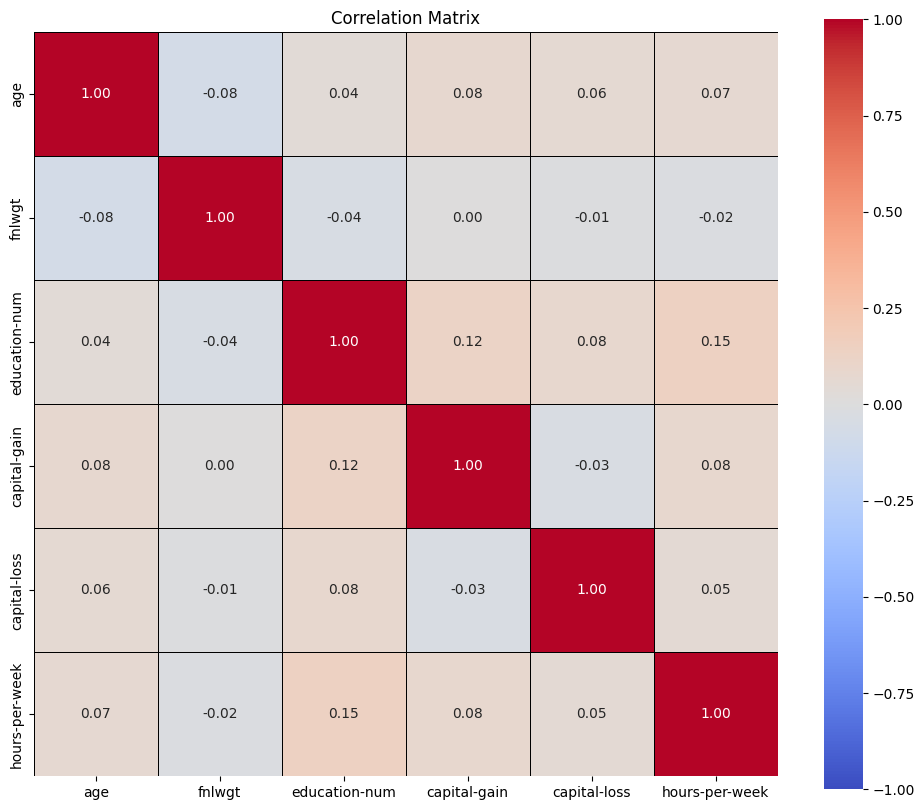

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=0.5, linecolor='black')
    
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)


### Observations

1. Diagonal Values (Perfect Correlation)
   - Each variable has a perfect positive correlation (1.00) with itself, which is expected.

2. Age
   - There is a weak negative correlation with `fnlwgt` (-0.08).
   - There are weak positive correlations with `education-num` (0.04), `capital-gain` (0.08), `capital-loss` (0.06), and `hours-per-week` (0.07).

3. Fnlwgt
   - This variable has a weak negative correlation with `age` (-0.08) and `education-num` (-0.04).
   - Almost no correlation with all other variables: `capital-gain` (0.00), `capital-loss` (-0.01), and `hours-per-week` (-0.02).

4. Education-num
   - Weak positive correlations with `age` (0.04), `capital-gain` (0.12), `capital-loss` (0.08), and `hours-per-week` (0.15).
   - Weak negative correlation with `fnlwgt` (-0.04).

5. Capital-gain
   - Weak positive correlations with `age` (0.08), `education-num` (0.12), and `hours-per-week` (0.08).
   - Weak negative correlation with `capital-loss` (-0.03).
   - Almost no correlation with `fnlwgt` (0.00).

6. Capital-loss
   - Weak positive correlations with `age` (0.06), `education-num` (0.08), and `hours-per-week` (0.05).
   - Weak negative correlation with `capital-gain` (-0.03).
   - Almost no correlation with `fnlwgt` (-0.01).

7. Hours-per-week
   - Weak positive correlations with `age` (0.07), `education-num` (0.15), `capital-gain` (0.08), and `capital-loss` (0.05).
   - Weak negative correlation with `fnlwgt` (-0.02).

**Overall Observat